## 스터디 까페 매출 분석
1. 문제 1,2는 음식 관련
2. 문제 3은 입장권 관련
3. 이후는 데이터를 보고 본인이 분석하고 싶은(?) 거 분석하기
4. 코랩에서 필요한 셀, LMS 주피터에서 필요한 셀이 각각 달라 한꺼번에 셀 실행시키면 안됨. 중간에 멈출 수 있음. 특히 데이터 불러올 초반과 한글 폰트 코드에서..

In [ ]:
# LMS에서 데이터 링크 걸기 참고 : https://jhnyang.tistory.com/269
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data  # simbolic link

In [ ]:
#구글 드라이브 파일 접근 코랩에서 진행할 때..
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# colab에서 진행할 때 나중에 나오는 한글 글꼴 설치 코드를 이거보다 먼저 실행행해야 함. 런타임 다시 시작해야 하니깐...

In [ ]:
# 데이터 호출하기 (LMS에서 진행할 때)
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [ ]:
# 데이터 호출하기

# google drive path : /content/drive/MyDrive/Colab Notebooks/aiffel/data/
# local path : D:\Google_Drive_4juneko\Colab Notebooks\aiffel

entry_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/item_entry_data.csv')

### 변수 리스트

|raw data|금액합 내림차순|Top 10|
|--------|--------|--------|
|entry_data(입장데이터)|total_entry_payment_data(입장권별 금액합)|entry_payment(입장권 Top10)|
|sales_data(판매데이터)|payment_month_data(월별 판매금액합)|
|sales_data(판매데이터)|total_item_count_data(상품별 판매수량합)|items_count(수량량 Top10)|
|sales_data(판매데이터)|total_item_payment_data(상품별 판매금액합)|items_payment(금액 Top10)|
|item_data(판매상품금액리스트)|
|item_entry_data(입장권금액리스트)|



In [ ]:
# entry_data 데이터 정보 확인하기
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
# sales_data 데이터 정보 확인하기
sales_data

In [ ]:
# item_data 데이터 정보 확인하기
item_data['상품명'].unique()

array(['이어폰(커널형)', '초코머핀', '쿠키(초코칩)', '쿠키(마카다미아)', '미니마카롱(3개)', '치즈케이크',
       '블루베리머핀', '쿠키(오트밀)', '크로플', '청귤차(HOT)', '초코라떼(HOT)', '유자차(HOT)',
       '카모마일(HOT)', '녹차라떼(HOT)', '레몬차(HOT)', '페퍼민트(HOT)', '고구마라떼(HOT)',
       '녹차(HOT)', '자몽차(HOT)', '허니밀크쉐이크', '블루베리스무디', '쿠앤크쉐이크', '플레인요거트스무디',
       '초코쉐이크', '딸기스무디', '민트초코칩쉐이크', '망고스무디', '녹차쉐이크', '커피쉐이크', '김치볶음밥',
       '라면', '짜장라면', '치즈불고기볶음밥', '계란추가', '낙지볶음밥', '새우볶음밥', '치즈감자튀김',
       '감자튀김', '치즈추가', '불닭볶음면', '만두라면', '2인라면', '소떡소떡', '2인짜장라면',
       '(면)치즈추가', '(면)계란후라이 추가-불닭/짜장', '맵단대패삼겹덮밥', '치킨카라아케 6pc',
       '단짠대패삼겹덮밥', '한돈고추장불고기덮밥', '만두', '한돈간장불고기덮밥', '2인불닭', '순살닭다리덮밥',
       '버팔로윙 6pc', '(면)계란추가-국물라면', '버팔로윙 10pc', '(밥)체다치즈추가',
       '치킨카라아케 10pc', '(밥)계란후라이 추가', '(밥)슈레드치즈추가', '비엔나소세지(토핑)', '아이스티',
       '레몬에이드', '초코라떼(ICE)', '청귤에이드', '자몽에이드', '청귤차(ICE)', '딸기라떼(ICE)',
       '레몬차(ICE)', '유자차(ICE)', '고구마라떼(ICE)', '카모마일(ICE)', '녹차라떼(ICE)',
       '자몽차(ICE)', '녹차(ICE)', '민트초코라떼(ICE)', '페퍼민트(ICE)', '유자에이드',
       '아메리카노(ICE)',

In [ ]:
# 아이템이 174개나 됨?
item_data[item_data['상품명']=='2인라면'] # 어떤 행의 값으로 검색

,구분,분류,상품명,판매금액
60,61,음식,2인라면,100원


In [ ]:
# 특정 행을 인덱스로 만들기, 검색하기 위해 사용했는데 필요없어짐. 아무튼 참고
item_data.set_index('상품명', drop = True, inplace = False)
item_data.loc['2인라면'] #검색하려고 했는데 안됨.. 왜 인지 찾아보자.. 언제?
item_data.reset_index(drop = False, inplace = True) # 위 코드를 초기화하기 위한 거

In [ ]:
# item_entry_data 데이터 정보 확인하기
item_entry_data
# 같은 분류 상품명에도 금액이 다르네?

### 문제 1 : 월별 매출액 추세

월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
힌트: groupby() 함수를 사용하세요.

In [ ]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_data의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]

In [ ]:
temp_var.head()  # 확인한다고 실행하면 실행할 때마다 바뀌는 것이 있어 실행 코드와 확인하는 코드는 별다른 셀에 하는 것이 좋겠음.

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [ ]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액']=temp_var['결제금액'].str.replace(',','')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액']=pd.to_numeric(temp_var['결제금액'])

In [ ]:
# 위 셀이랑 같은 결과 나오는 코드. 쉼표 지우고 숫자로 바꾸기 한꺼번에
temp_var['결제금액']=temp_var.결제금액.str.replace(',','').astype('int64')

# 여러 방법 참고 url : https://rfriend.tistory.com/463
# 여기까지 데이터 타입 맞춤. 문제 1,2 에서 sales_data에서 데이터 추출할 거임.

In [ ]:
sales_data.dtypes

결제일시    object
판매위치    object
상품명     object
결제방식    object
비고      object
판매수량     int64
결제금액     int64
고객      object
date    object
dtype: object

In [ ]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [ ]:
sales_data #결제금액에 마이너스????

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [ ]:
temp_var.head()  # sales_data 기준으로 코드드 작성했는데도 temp_var도 코드가 적용되어 있네! 이것저것 만지다가 그런 거 같음

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [ ]:
# temp_var의 payment열을 date 기준으로 집계하기 
# 7103, 7104 행을 보니 결제 완료 후 판매 취소가 됨. 그렇다면 +-하여 판매취소가 된 결제완료 행을 없앨 수 있음.
payment_month_data = sales_data['결제금액'].groupby(sales_data['date']).sum()
payment_month_data.head()

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
Name: 결제금액, dtype: int64

In [ ]:
# 집계 결과를 시각화하기
# payment_data 전처리
payment_month_data.index = payment_month_data.index.tolist()
payment_month_data = payment_month_data.reset_index()
payment_month_data = payment_month_data.rename(columns = {'index':'Date'})

In [ ]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정. LMS에서 제시한 방법
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


In [ ]:
# colab에서 한글 사용 시 설치 필요 설치 후 런타임 재시작도 꼭!! 
# 재시작하면 위에 코드 모두 다시 실행해야 하므로 제일 먼저 할 필요가 있음.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#한글 깨짐 해결. 주피터에서 그냥 잘 작동하나 colab에서는 위 코드로 설치 필요 https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9/
plt.rcParams['font.family'] = 'NanumBarunGothic'

#### 월별 매출액 그래프

Text(0.5, 1.0, 'Total Sales by Each Month')

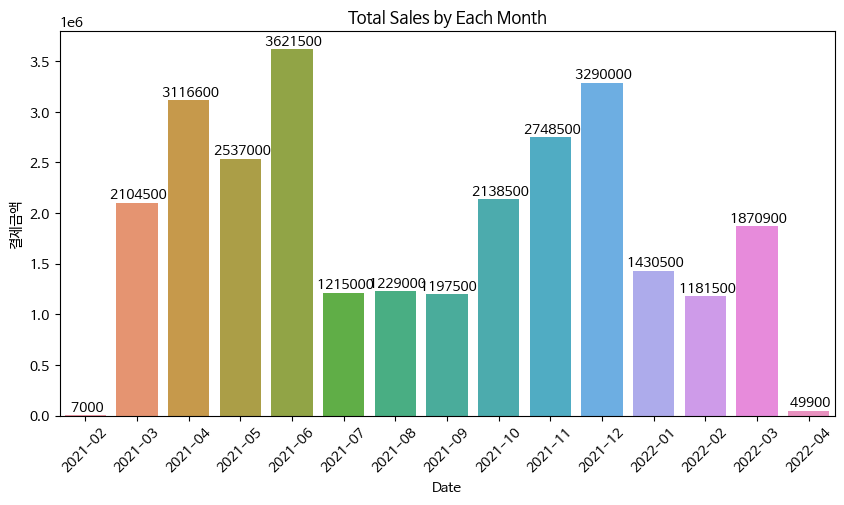

In [ ]:
# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

# 설정 및 여러가지
ax = sns.barplot(data = payment_month_data, x = 'Date', y = '결제금액')
plt.xticks(rotation=45)  # 눈금라벨이 길어서 옆으로 눕혔엉
containers = ax.containers[0]   # 데이터 라벨 리스트?
ax.bar_label(containers, labels = [f'{x: .0f}' for x in containers.datavalues], label='edge') # f-string 이해가 필요함. .0f는 소수점 표시 안함. 참고 : https://bio-info.tistory.com/133
plt.title('Total Sales by Each Month')

# 2021-02, 2022-04은 그 달 전체 데이터가 없어 추이 분석에서는 제외하는 것이 좋겠음
# 2021-06, 2021-12의 매출이 최상인 이유는 기말고사 기간이라...? 그럼 중간고사 4월 10월은 ? 
# 계절에 따라 판매 음식이 어떻게 다른지 알면 좋겠음. 선택과 집중이 필요한지... 

In [ ]:
payment_month_data.head()

,Date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500


### 문제 2: 가장 인기 있는 음식/음료

In [ ]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.     <===이럼 취소되기 전 결제 데이터가 있으니 취소된 거도 판매된 거라고 집계되는 거 아님?
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]

temp_var1 = sales_data[sales_data['판매수량']==1].reset_index(drop=True)
temp_var1
temp_var2 = sales_data[sales_data['판매수량']==-1].reset_index(drop=True)
temp_var2

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-03-31 11:31,카운터,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN
1,2022-03-31 11:13,카운터,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN
2,2022-03-26 20:17,선불기1,아메리카노(ICE),신용카드,판매취소,-1,"-4,400",NaN
3,2022-03-26 20:16,선불기1,아메리카노(HOT),신용카드,판매취소,-1,"-3,900",NaN
4,2022-03-26 20:16,선불기1,크로플,신용카드,판매취소,-1,"-5,500",NaN
...,...,...,...,...,...,...,...,...
155,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
156,2021-02-17 14:21,카운터,카페라떼(HOT),현금,결제취소,-1,"-4,000",NaN
157,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
158,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN


In [ ]:
total_item_count_data1 = pd.DataFrame() # 빈 데이터 프레임 만들기, 뒤 코드 실행했다 앞으로 넘어오면 꼬일 때가 있어 초기화할 필요가 있었음.
total_item_count_data1['판매수1'] = temp_var1['상품명'].value_counts()

total_item_count_data2 = pd.DataFrame() # 빈 데이터 프레임 만들기, 뒤 코드 실행했다 앞으로 넘어오면 꼬일 때가 있어 초기화할 필요가 있었음.
total_item_count_data2['판매수2'] = temp_var2['상품명'].value_counts() # 판매수2는 취소한 상품 수

In [ ]:
total_item_count_data1.head(10)

,판매수1
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [ ]:
total_item_count_data2

,판매수2
아메리카노(ICE),30
아메리카노(HOT),16
샷추가,10
아이스티,8
김치볶음밥,7
라면,7
카페라떼(HOT),6
2인라면,5
초코라떼(ICE),4
카페모카(HOT),4


In [ ]:
total_item_count_data3 = pd.concat([total_item_count_data1,total_item_count_data2], axis=1)
total_item_count_data3 = total_item_count_data3.fillna(0).astype({'판매수2' : int})
total_item_count_data3

,판매수1,판매수2
김치볶음밥,1204,7
라면,749,7
짜장라면,455,2
치즈불고기볶음밥,420,3
계란추가,314,1
...,...,...
라면(계란/치즈추가),1,0
녹차(HOT),1,0
짜장라면(계란추가),1,0
이어폰(커널형),1,0


In [ ]:
total_item_count_data = pd.DataFrame()
total_item_count_data['판매수'] = total_item_count_data3['판매수1']-total_item_count_data3['판매수2']
total_item_count_data

,판매수
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
...,...
라면(계란/치즈추가),1
녹차(HOT),1
짜장라면(계란추가),1
이어폰(커널형),1


In [ ]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기, value_count()함수 사용해서서

# total_item_count_data = pd.DataFrame() # 빈 데이터 프레임 만들기, 뒤 코드 실행했다 앞으로 넘어오면 꼬일 때가 있어 초기화할 필요가 있었음.
# total_item_count_data['판매수'] = temp_var['상품명'].value_counts()

# groupby() 사용한 거
# total_item_count_data = pd.DataFrame(total_item_count_data)
# total_item_count_data = total_item_count_data.rename(columns = {'index':'상품명'})
# total_item_count_data = total_item_count_data(['판매수'].groupby(total_item_count_data['상품명']).sum().reset_index()

# #column index  붙이기기
total_item_count_data.index = total_item_count_data.index.tolist()
total_item_count_data = total_item_count_data.reset_index()
total_item_count_data = total_item_count_data.rename(columns = {'index':'상품명'})

In [ ]:
total_item_count_data

,상품명,판매수
0,김치볶음밥,1197
1,라면,742
2,짜장라면,453
3,치즈불고기볶음밥,417
4,계란추가,313
...,...,...
95,라면(계란/치즈추가),1
96,녹차(HOT),1
97,짜장라면(계란추가),1
98,이어폰(커널형),1


In [ ]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
total_item_count_data = total_item_count_data.sort_values(by = ['판매수'], ascending =False) #value_counts() 사용하면 이미 sort 
items_count = total_item_count_data.head(10)

# 상위 10개 출력하는 다른 방법
items_count = total_item_count_data.nlargest(10, '판매수')
items_count

,상품명,판매수
0,김치볶음밥,1197
1,라면,742
2,짜장라면,453
3,치즈불고기볶음밥,417
4,계란추가,313
5,낙지볶음밥,310
6,새우볶음밥,307
7,아메리카노(ICE),254
8,치즈감자튀김,245
9,감자튀김,242


Text(0.5, 1.0, '판매수 by 상품명')

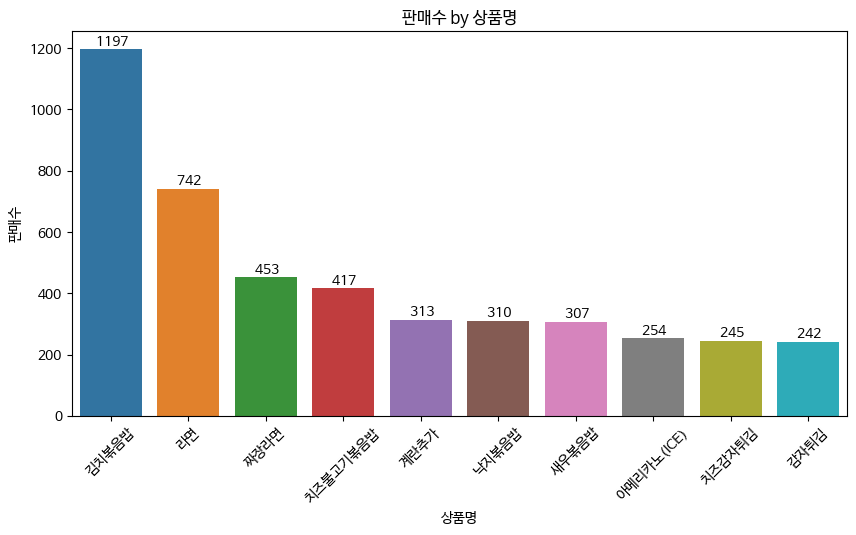

In [ ]:
#한글 깨짐 해결 https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9/
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

# 설정 및 여러가지
ax = sns.barplot(data = items_count, x = '상품명', y = '판매수')
plt.xticks(rotation=45)
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x: .0f}' for x in containers.datavalues], label='edge')
plt.title('판매수 by 상품명')

# 음료는 아메리카노만 10위 안에 랭크 나머지 9개는 식사.. 물장사가 남는 거라고 그러던데 음료가 맛이 없나봄.

In [ ]:
total_item_count_data

In [ ]:
temp_var

In [ ]:
total_item_payment_data = pd.DataFrame()
total_item_payment_data = temp_var['결제금액'].groupby(temp_var['상품명']).sum().reset_index()


In [ ]:
total_item_payment_data

,상품명,결제금액
0,(면)계란추가-국물라면,5000
1,(면)계란후라이 추가-불닭/짜장,20000
2,(면)치즈추가,10500
3,(밥)계란후라이 추가,3000
4,(밥)슈레드치즈추가,4500
...,...,...
95,한돈간장불고기덮밥,112500
96,한돈고추장불고기덮밥,127500
97,허니밀크쉐이크,114000
98,헤이즐넛라떼(HOT),9000


In [ ]:
total_item_payment_data = total_item_payment_data.sort_values(by = '결제금액', ascending = False)

In [ ]:
total_item_payment_data.head(10)

,상품명,결제금액
13,김치볶음밥,6004400
23,라면,2941500
73,치즈불고기볶음밥,2292600
62,짜장라면,2038500
14,낙지볶음밥,1710700
43,새우볶음밥,1539800
72,치즈감자튀김,1354200
9,감자튀김,1083800
49,아메리카노(ICE),1058100
39,불닭볶음면,693000


In [ ]:
# 상위 10개 출력하는 다른 방법
items_payment = total_item_payment_data.nlargest(10, '결제금액')
items_payment

,상품명,결제금액
13,김치볶음밥,6004400
23,라면,2941500
73,치즈불고기볶음밥,2292600
62,짜장라면,2038500
14,낙지볶음밥,1710700
43,새우볶음밥,1539800
72,치즈감자튀김,1354200
9,감자튀김,1083800
49,아메리카노(ICE),1058100
39,불닭볶음면,693000


#### 상품별 결제금액 그래프

Text(0.5, 1.0, '결제금액 by 상품명')

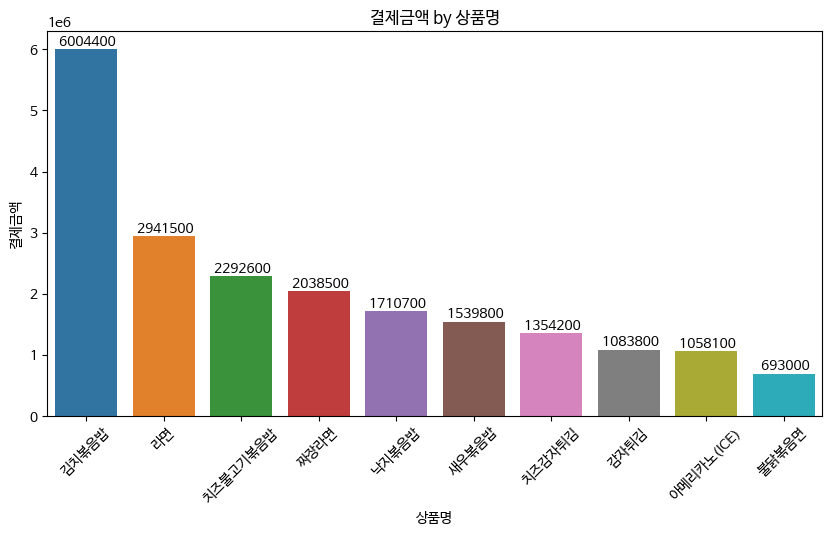

In [ ]:
#한글 깨짐 해결 https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9/
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

# 설정 및 여러가지
ax = sns.barplot(data = items_payment, x = '상품명', y = '결제금액')
plt.xticks(rotation=45)
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x: .0f}' for x in containers.datavalues], label='edge')
plt.title('결제금액 by 상품명')

### 문제 3: 가장 많이 팔린 입장권 종류

In [ ]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date,입장수
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04,1
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04,1
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04,1
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04,1
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,2022-04,1
...,...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02,1
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02,1
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02,1
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02,1


In [ ]:
temp_var.dtypes

요금제명    object
입실      object
퇴실      object
이용      object
위치      object
금액       int64
구분      object
고객      object
date    object
입장수      int64
dtype: object

In [ ]:
# temp_var의 금액을 숫자형태로 변환하기
# 이미 금액은 숫자인데 왜 또 변환하래? 아무튼 변환 코드는 아래와 같음.
temp_var['금액']=pd.to_numeric(temp_var['금액'])
temp_var.dtypes

요금제명    object
입실      object
퇴실      object
이용      object
위치      object
금액       int64
구분      object
고객      object
dtype: object

In [ ]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
total_entry_payment_data = temp_var['금액'].groupby(temp_var['요금제명']).sum().reset_index()

In [ ]:
total_entry_payment_data = total_entry_payment_data.sort_values(by = '금액', ascending = False)
total_entry_payment_data

,요금제명,금액
21,한국대생 입장권(종일권),70037000
17,입장권(종일권),23570500
15,심야-조조무제한(06시까지),11600000
14,심야-조조무제한,6221000
20,한국대생 무제한 입장권,5207500
11,시간요금제(1시간),2665500
13,시간요금제(3시간),2042000
5,무제한 입장권,1568600
0,18시이후 무제한,1330500
18,조조무제한,693000


In [ ]:
entry_payment = total_entry_payment_data.nlargest(10, '금액')

In [ ]:
entry_payment

,요금제명,금액
21,한국대생 입장권(종일권),70037000
17,입장권(종일권),23570500
15,심야-조조무제한(06시까지),11600000
14,심야-조조무제한,6221000
20,한국대생 무제한 입장권,5207500
11,시간요금제(1시간),2665500
13,시간요금제(3시간),2042000
5,무제한 입장권,1568600
0,18시이후 무제한,1330500
18,조조무제한,693000


#### 요금제명별 매출액 그래프 

Text(0.5, 1.0, '금액 by 요금제명')

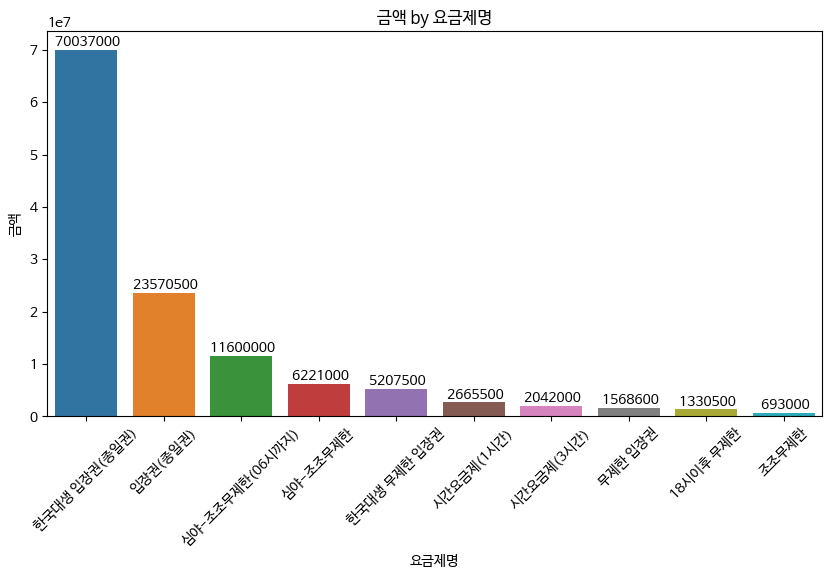

In [ ]:
#한글 깨짐 해결 https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9/
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

# 설정 및 여러가지
ax = sns.barplot(data = entry_payment, x = '요금제명', y = '금액')
plt.xticks(rotation=45)
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x: .0f}' for x in containers.datavalues], label='edge')
plt.title('금액 by 요금제명')

# 한국대 앞인가 봄. 
# 종일권이 1,2등이네 잠깐 왔다 가는 사람은 별로 없음. 그럼 밥도 먹겠네. 어떤 메뉴를 먹을까? 
# 입장권 수익과 음식 판매 수익 전체를 비교해보자. 구지, 음식 판매 수익이 현저히 적으면 음식 판매를 중단하는 선택을 할 수도 있음.

### 변수 리스트 

|raw data|금액합 내림차순|Top 10|
|--------|--------|--------|
|entry_data(입장데이터)|total_entry_payment_data(입장권별 금액합)|entry_payment(입장권 Top10)|
|sales_data(판매데이터)|payment_month_data(월별 판매금액합)|
|sales_data(판매데이터)|total_item_count_data(상품별 판매수량합)|items_count(판매수량 Top10)|
|sales_data(판매데이터)|total_item_payment_data(상품별 판매금액합)|items_payment(금액 Top10)|
|item_data(판매상품금액리스트)|
|item_entry_data(입장권금액리스트)|
|entry_data(입장데이터)|entry_month_data(월별 입실수)|
|sales_data(판매데이터)|total_item_count_month_data(월별 상품별 판매수량)|item_count_month(월별 상위 3개 상품별 판매수량)|
|entry_data(입장데이터)|total_entry_count_month_data(월별 요금제명별 판매수량)|entry_count_month(월별 상위 3개 요금제명별 판매수량)|

In [ ]:
# 입장권 판매 통계
total_entry_payment_data.describe()
# 총 판매 금액 = count * mean = 22 * 5.70 *10^6 = 약1억2천5백만

In [ ]:
# 상품 판매 금액 통계
total_item_payment_data.describe()
# 총 판매 금액 = count * mean = 100 * 2.83 *10^5 = 약2천8백만

### 내가 정의한 문제 해결하기

* 스터디 까페의 위치가 한국대 근처인 거 같다. 그렇다면 학사일정에 맞게 중간고사 기말고사 모두 입실수가 많아야 할 텐데 월별 매출액액 추이를 보면 중간고사 인 4월10월 매출액이 상대적으로 낮음. 진짜 입실수가 적은지 확인 필요(월별 입실수 추이가 필요함)    

* 종일권이 1,2등이네 잠깐 왔다 가는 사람은 별로 없음. 그럼 밥도 먹겠네. 어떤 메뉴를 먹을까?  
입장권 수익과 음식 판매 수익 전체를 비교해보자. 구지, 음식 판매 수익이 현저히 적으면 음식 판매를 중단하는 선택을 할 수도 있음.  

* => 입장권 수익 1억 2천 5백만 / 상품 판매 금액 2천 8백만  
입장권 수익이 약 4.5배인데   
상품 판매는 원재료 가격이 반영 안되어 있어 순수익이 얼마인지 모름  
  

* => 수익만 고려하여 상품판매를 하지 않는다면 소비자에 대한 편의 제공이 없어 스터디 카페를 이용하는 사람 수가 급감할 수 있음.   
게다가 종일권 이용수가 많은 것은 식사 제공이 그 영향일 수 있음.  

  
* **확인필요** => 입실수가 많을 거라 예상하는 6월12월에 입장권 1등이 무엇인지 알 필요가 있겠다 그들이 더 먹었겠지. 
  

 * 아마도 종일권이 1등이겠지 전체도 1등이었으니깐 자명  
그럼 그들은 무엇을 먹었을까? 그거를 입장권에 붙여팔까? 패키지로 입장권+식사권 ?
 

그래서 할 일..

* 계절에 따라 판매 음식이 어떻게 다른지 알면 좋겠음. 선택과 집중이 필요한지...  

* 입장도 6월 12월 많을까?  

* 월별 입실수 비교 entry_data에서 입실 시간을 월로 바꾸고 월별 입실수를 count하자  


#### 월별 입실수 추이
* 상품 판매 수를 보면 6월12월이 높을 거라고 예상했음
결과는 4,5,11월도 입실 수 많음

In [ ]:
# entry_data에서 월별 입실수 추이 알기
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 date열을 만들고, entry_data의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = entry_data['입실'].str[:7]

In [ ]:
temp_var

In [ ]:
# temp_var의 date 기준으로 입실수 집계하기 
entry_month_data = pd.DataFrame() # 빈 데이터 프레임 만들기, 
entry_month_data['입실수'] = temp_var['date'].value_counts()
entry_month_data.head()

,입실수
2021-04,2926
2021-06,2874
2021-11,2744
2021-05,2699
2021-12,2318


In [ ]:
# 집계 결과를 시각화하기
# entry_month_data 전처리
entry_month_data.index = entry_month_data.index.tolist()
entry_month_data = entry_month_data.reset_index()
entry_month_data = entry_month_data.rename(columns = {'index':'Date'})

In [ ]:
entry_month_data

In [ ]:
# Date 기준으로 sort
entry_month_data = entry_month_data.sort_values(by = 'Date', ascending = True)
entry_month_data

,Date,입실수
13,2021-02,56
5,2021-03,1759
0,2021-04,2926
3,2021-05,2699
1,2021-06,2874
8,2021-07,912
11,2021-08,762
10,2021-09,775
6,2021-10,1650
2,2021-11,2744


##### 월별 입실수 그래프 

Text(0.5, 1.0, 'Total Entry Count by Each Month')

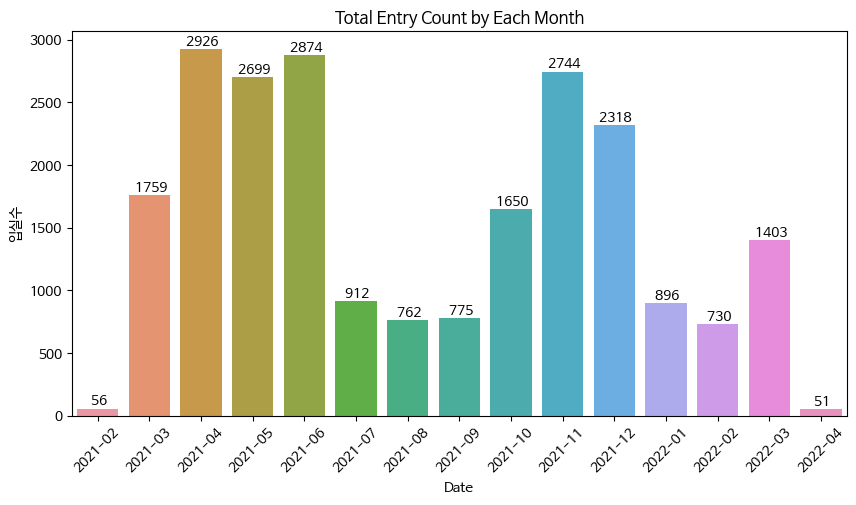

In [ ]:
# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

# 설정 및 여러가지
ax = sns.barplot(data = entry_month_data, x = 'Date', y = '입실수')
plt.xticks(rotation=45)  # 눈금라벨이 길어서 옆으로 눕혔엉
containers = ax.containers[0]   # 데이터 라벨 리스트?
ax.bar_label(containers, labels = [f'{x: .0f}' for x in containers.datavalues], label='edge') # f-string 이해가 필요함. .0f = 소수점 표시 안함. 참고 : https://bio-info.tistory.com/133
plt.title('Total Entry Count by Each Month')

# 헐 6월 12월 음식 판매가 높아 입장객 수도 제일 높은 줄 예상했는데 아님 4,5,6,11월이 높아
# 2021-02, 2022-04는 데이터가 적음 빼도 되겠음

#### 월별 요금제명 상위가 뭘까?
* 입실은 많이 해도 음식을 안사먹는 이유가 궁금해짐
잠깐 왔다가는 요금제가 많았나?

* 결과는 계속 종일 요금제가 많았음.
종일 요금제로 입장해도 밥을 안먹어서 판매수가 적었었음.

* 그렇다면 입장권과 식사권을 묶어 패키지로 판매하면 어떨까? 어떤 음식을 묶을까? 

In [ ]:
# 월별 입장권 종류
temp_var['입장수'] = 1
# 판매수량을 date와 입장권을 기준으로 묶음.
total_entry_count_month_data = temp_var['입장수'].groupby([temp_var['date'],temp_var['요금제명']]).count()
total_entry_count_month_data = pd.DataFrame(total_entry_count_month_data)
total_entry_count_month_data

# entry_month_data['입실수'] = temp_var['date'].value_counts()

입장수
date    요금제명             
2021-02 1시간 요금제         7
        무제한(일반요금)       1
        무제한(한국대생)       2
        시간권             5
        시간요금제           2
...                   ...
2022-04 기간권             3
        무제한 입장권         6
        시간요금제(1시간)      3
        시간요금제(3시간)      1
        한국대생 무제한 입장권   38

[121 rows x 1 columns]

In [ ]:
# sort
total_entry_count_month_data = total_entry_count_month_data.sort_values(['date','입장수'], ascending= [True, False]).reset_index()
total_entry_count_month_data

,date,요금제명,입장수
0,2021-02,종일요금제,37
1,2021-02,1시간 요금제,7
2,2021-02,시간권,5
3,2021-02,무제한(한국대생),2
4,2021-02,시간요금제,2
...,...,...,...
116,2022-04,한국대생 무제한 입장권,38
117,2022-04,무제한 입장권,6
118,2022-04,기간권,3
119,2022-04,시간요금제(1시간),3


In [ ]:
# 월별 입장권 상위 3개만 추출 참고 : https://rfriend.tistory.com/454
entry_count_month = total_entry_count_month_data.groupby('date').head(3)
entry_count_month

,date,요금제명,입장수
0,2021-02,종일요금제,37
1,2021-02,1시간 요금제,7
2,2021-02,시간권,5
7,2021-03,한국대생 입장권(종일권),960
8,2021-03,입장권(종일권),340
9,2021-03,심야-조조무제한(06시까지),236
16,2021-04,한국대생 입장권(종일권),1754
17,2021-04,심야-조조무제한(06시까지),649
18,2021-04,입장권(종일권),276
24,2021-05,한국대생 입장권(종일권),1441


##### 월별 요금제명 상위 3개씩 그래프

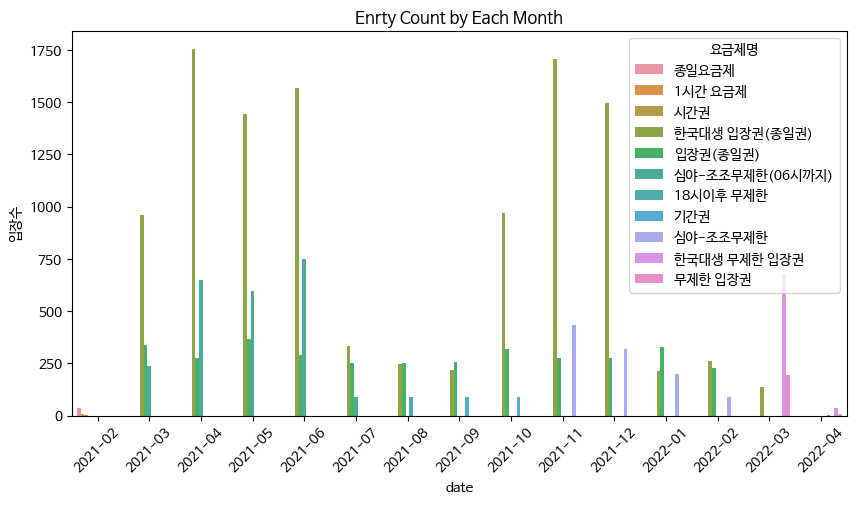

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(10,5))

ax = sns.barplot(data=entry_count_month, x='date', y='입장수', hue='요금제명')

plt.xticks(rotation=45)

# 바 라벨을 요금제명명으로 붙이고 싶은데 잘 모르겠음. 옆에 legend로 붙어 있어 그런가?
# containers = ax.containers[2]
# containers0 = ax.containers[1]

# ax.bar_label(containers, labels=[f'{x}' for x in containers.datavalues], label_type='center') #f-string .0f=소수점 자리 
# ax.bar_label(containers0, labels=[f'{x}' for x in containers0.datavalues], label_type='center')

plt.title('Enrty Count by Each Month')

plt.show()

# 한국대생 입장권(종일권)이 3월보다 4월에 약 1.7배 증가했음.


#### 월별 판매상품 상위가 뭘까?

* 4월에는 다른 달과 다르게 2인 라면이 2등임. 나눠먹었나 봄. 그러니 입실수는 많으나 판매금액이 상대적으로 적었네 게다가 item_data를 보면 가격이 100원임.  

* 8월부터는 김치볶음밥, 짜장라면, 라면 정도로 메뉴 종류가 수렴됨. 음료는 거의 안마심. 메뉴를 여럿할 것이 아니라 이거 상위 3개를 중심으로 종일요금제와 패키지로.  

* 덧붙여 판매 상품의 종류를 줄이자. 특히, 2인 라면은 없애자 4월 입실수에 비해 음식 매출액이 적었던 이유

* 여름과 겨울의 주문 주요 메뉴를 비교해보면 계절에 관계가 없어 보임.

In [ ]:
#월별 각 판매상품 수 시각화
temp_var = sales_data
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [ ]:
# 판매수량을 date와 상품명을 기준으로 묶음.
total_item_count_month_data = temp_var['판매수량'].groupby([temp_var['date'],temp_var['상품명']]).count()
total_item_count_month_data = pd.DataFrame(total_item_count_month_data)
total_item_count_month_data

판매수량
date    상품명             
2021-02 아메리카노(HOT)     6
        카페라떼(HOT)      4
        카페모카(HOT)      8
2021-03 감자튀김          13
        계란추가          34
...                  ...
2022-04 순살닭다리덮밥        1
        아이스티           1
        짜장라면(계란추가)     1
        치킨카라아케 6pc     1
        크로플            1

[684 rows x 1 columns]

In [ ]:
# sort
total_item_count_month_data = total_item_count_month_data.sort_values(['date','판매수량'], ascending= [True, False]).reset_index()
total_item_count_month_data.head()

,index,date,상품명,판매수량
0,0,2021-02,카페모카(HOT),8
1,1,2021-02,아메리카노(HOT),6
2,2,2021-02,카페라떼(HOT),4
3,3,2021-03,김치볶음밥,98
4,4,2021-03,짜장라면,44


In [ ]:
# 월별 판매수 상위 3개만 추출 참고 : https://rfriend.tistory.com/454
item_count_month = total_item_count_month_data.groupby('date').head(3)
item_count_month.head(10)

,index,date,상품명,판매수량
0,0,2021-02,카페모카(HOT),8
1,1,2021-02,아메리카노(HOT),6
2,2,2021-02,카페라떼(HOT),4
3,3,2021-03,김치볶음밥,98
4,4,2021-03,짜장라면,44
5,5,2021-03,라면,40
54,54,2021-04,김치볶음밥,165
55,55,2021-04,2인라면,99
56,56,2021-04,치즈불고기볶음밥,71
114,114,2021-05,김치볶음밥,128


##### 월별 판매상품 상위 3개씩 그래프 

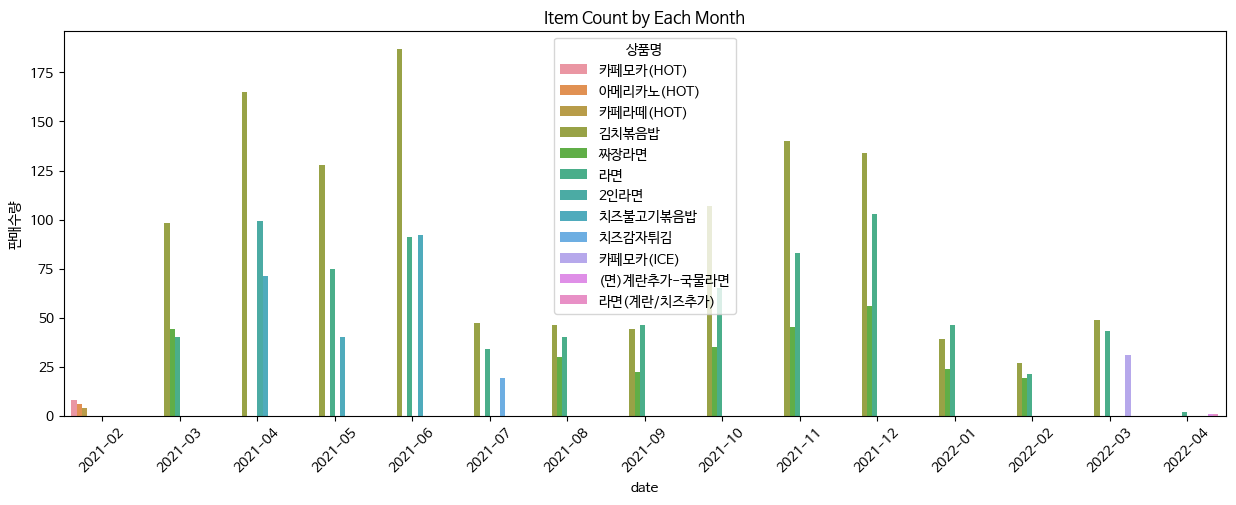

In [ ]:
# 그래프 사이즈 변경 https://abluesnake.tistory.com/124
plt.figure(figsize=(15,5))

ax = sns.barplot(data=item_count_month, x='date', y='판매수량', hue='상품명')

plt.xticks(rotation=45)

#바 라벨을 상품명으로 붙이고 싶은데 잘 모르겠음.
# containers = ax.containers[2]
# containers0 = ax.containers[1]

# ax.bar_label(containers, labels=[f'{x}' for x in containers.datavalues], label_type='center') #f-string .0f=소수점 자리 
# ax.bar_label(containers0, labels=[f'{x}' for x in containers0.datavalues], label_type='center')

plt.title('Item Count by Each Month')

plt.show()

# 결론
# 일단, 중구난방인 가격정책이 개선되어야 함.
# 4월에는 다른 달과 다르게 2인 라면이 2등임. 나눠먹었나 봄. 게다가 100원임 그러니 입실수는 많으나 판매금액이 상대적으로 적었네
# 8월부터는 김치볶음밥, 짜장라면, 라면 정도로 메뉴가 수렴되고 있음. 
# 음료는 거의 안마심. 메뉴를 여럿할 것이 아니라 이거 3개를 중심으로 메뉴를 줄일 필요가 있음. 특히, 2인 라면은 없애야 하지 않을까?
# 여름과 겨울의 주문 주요 메뉴를 비교해보면 계절에 관계가 없어 보임.

### 남들이 한 거 따라해보기 
기억나는 것만 
* [x] 상위 10개 파이플럿 
* [x] 고객별 분석
* [ ] 시간, 요일 전처리
* [ ] 시간대별 입장객수
* [ ] RFM

더이상 기억이 안남

Text(0.5, 1.0, '결제금액 by 상품명')

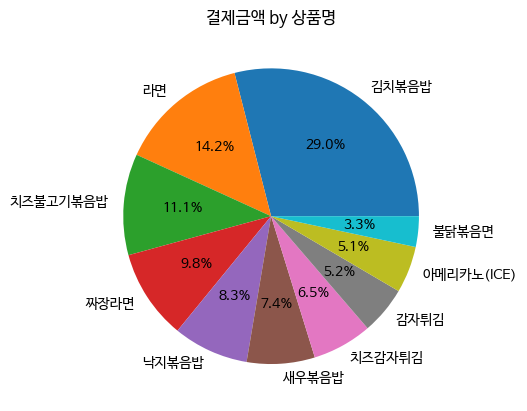

In [ ]:
# 문제 2 상품별 결제금액 파이 그래프
#한글 깨짐 해결 https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9/
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 설정 및 여러가지
plt.pie(data = items_payment, x = '결제금액', labels = '상품명', autopct='%.1f%%')
plt.title('결제금액 by 상품명')

Text(0.5, 1.0, '금액 by 요금제명')

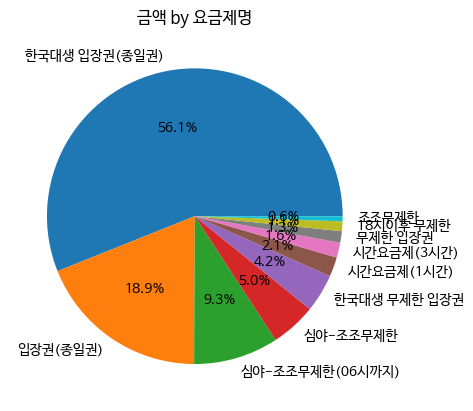

In [ ]:
# 요금제명별 매출액 파이그래프
# 설정 및 여러가지
plt.pie(data = entry_payment, x = '금액', labels ='요금제명', autopct='%.1f%%')
plt.title('금액 by 요금제명')

In [ ]:
# 입장권 및 상품 구매액 top 30 고객
sales_data

In [ ]:
sales_data['고객'].unique()

In [ ]:
sales_data['고객'].value_counts()

In [ ]:
sales_data[sales_data['고객']=='customer667032']


In [ ]:
entry_data[entry_data['고객']=='customer667032']

In [ ]:
payment_customer_data = sales_data['결제금액'].groupby(sales_data['고객']).sum().sort_values(ascending = False)
payment_customer_data = pd.DataFrame(payment_customer_data)
payment_customer_data.head(30)

In [ ]:
entry_customer_data = entry_data['금액'].groupby(entry_data['고객']).sum().sort_values(ascending = False)
entry_customer_data = pd.DataFrame(entry_customer_data)
entry_customer_data.head(30)

In [ ]:
customer_data = pd.concat([payment_customer_data,entry_customer_data], axis=1).fillna(0).astype({'결제금액' : int, '금액': int})

customer_data['total'] = customer_data['결제금액']+customer_data['금액']
customer_data = customer_data.sort_values(by = 'total', ascending = False ).head(20)
customer_data

,결제금액,금액,total
고객,,,
customer338849,14000,949500,963500
customer667032,263500,478500,742000
customer488580,33000,314500,347500
customer977070,128800,192800,321600
customer496146,84000,237500,321500
customer243082,78000,240000,318000
customer941866,53500,239500,293000
customer744264,9000,279900,288900
customer241622,73000,213000,286000


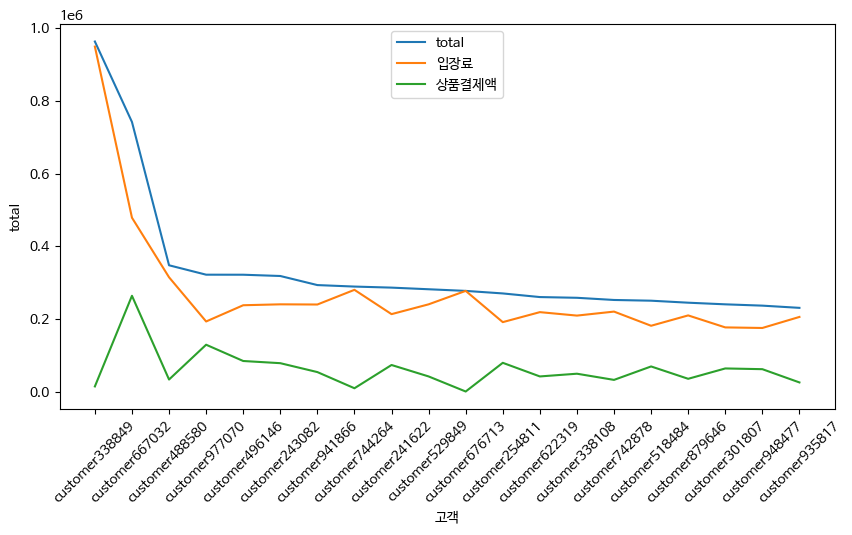

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(10,5))

ax = sns.lineplot(data=customer_data, x='고객', y='total',label = 'total')
ax2 = sns.lineplot(data=customer_data, x='고객', y='금액', label = '입장료')
ax3 = sns.lineplot(data=customer_data, x='고객', y='결제금액', label = '상품결제액')
plt.xticks(rotation=45)
plt.legend(loc = 9)

plt.show()

# 2명의 고객이 다른 고객에 비해 큰 비중을 차지함. 
# 1등 고객은 입장권 구매가 상품 구매에 비해 월등이 높음. (100:1.5)
# 2등 고객은 2:1정도
# 11번째 529849 고객은 상품구매 없이 입장권 구매만 함. # 주목할 사람 #


In [ ]:
entry_data[entry_data['고객']== 'customer338849']
#3-4시간 있다감.

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
5549,입장권(종일권),2021-11-29 13:56,2021-11-29 17:27,오전 3:31:00,선불기2,7500,퇴실,customer338849
5876,입장권(종일권),2021-11-25 14:12,2021-11-25 17:22,오전 3:10:00,선불기2,6500,퇴실,customer338849
5955,입장권(종일권),2021-11-24 14:16,2021-11-24 17:40,오전 3:24:00,선불기2,6500,퇴실,customer338849
6065,입장권(종일권),2021-11-23 13:50,2021-11-23 17:28,오전 3:38:00,선불기2,6500,퇴실,customer338849
6145,입장권(종일권),2021-11-22 13:47,2021-11-22 17:22,오전 3:35:00,선불기2,6500,퇴실,customer338849
...,...,...,...,...,...,...,...,...
22185,입장권(종일권),2021-03-08 13:17,2021-03-08 18:12,오전 4:55:00,선불기2,7500,퇴실,customer338849
22353,입장권(종일권),2021-03-05 13:37,2021-03-05 18:07,오전 4:30:00,선불기2,6000,퇴실,customer338849
22380,입장권(종일권),2021-03-04 13:41,2021-03-04 18:00,오전 4:19:00,선불기2,7000,퇴실,customer338849
22419,입장권(종일권),2021-03-03 14:05,2021-03-03 15:59,오전 1:54:00,선불기2,7000,퇴실,customer338849


In [ ]:
entry_data[entry_data['고객']== 'customer529849']

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
6257,한국대생 입장권(종일권),2021-11-21 12:57,2021-11-21 19:55,오전 6:58:00,선불기2,6500,퇴실,customer529849
7209,한국대생 입장권(종일권),2021-11-11 20:39,2021-11-12 10:37,오후 1:58:00,선불기2,6500,퇴실,customer529849
8431,한국대생 입장권(종일권),2021-10-26 16:19,2021-10-26 22:58,오전 6:39:00,선불기2,6500,퇴실,customer529849
8503,한국대생 입장권(종일권),2021-10-25 15:48,2021-10-25 23:07,오전 7:19:00,선불기2,6500,퇴실,customer529849
8701,심야-조조무제한,2021-10-23 7:33,2021-10-23 17:38,오전 10:05:00,선불기2,5000,퇴실,customer529849
8769,한국대생 입장권(종일권),2021-10-21 16:35,2021-10-21 21:55,오전 5:20:00,선불기2,6500,퇴실,customer529849
8881,한국대생 입장권(종일권),2021-10-20 11:05,2021-10-20 21:44,오전 10:39:00,선불기2,6500,퇴실,customer529849
8926,한국대생 입장권(종일권),2021-10-19 15:09,2021-10-19 21:56,오전 6:47:00,선불기2,6500,퇴실,customer529849
9123,조조무제한,2021-10-16 9:23,2021-10-16 17:47,오전 8:24:00,선불기2,5000,퇴실,customer529849
9134,한국대생 입장권(종일권),2021-10-15 14:55,2021-10-15 19:33,오전 4:38:00,선불기2,6500,퇴실,customer529849
